In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
df_true = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
df_fake = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

In [3]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df_true = df_true.drop(['subject','date'], axis=1)
df_true.head()

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...


In [6]:
df_fake = df_fake.drop(['subject','date'], axis=1)
df_fake.head()

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


In [7]:
c_read = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
c_true = c_read['subject']
c_1 = c_true.replace(['politicsNews','worldnews'],'True')
c_1 = c_1.rename('Status')
c_1.head()

0    True
1    True
2    True
3    True
4    True
Name: Status, dtype: object

In [8]:
c_read = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")
c_true = c_read['subject']
c_2 = c_true.replace(['News','Government News','politics','left-news','US_News'],'Fake')
c_2 = c_2.rename('Status')
c_2.head()

0    Fake
1    Fake
2    Fake
3    Fake
4    Fake
Name: Status, dtype: object

In [9]:
df_1 = pd.concat([df_true,c_1],axis=1)
df_1.head()

,title,text,Status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,True


In [10]:
df_2 = pd.concat([df_fake,c_2],axis=1)
df_2.head()

,title,text,Status
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Fake


In [11]:
from sklearn.utils import shuffle
df = pd.concat([df_1,df_2])
df = df.rename(columns={'title':'Title','text':'Content'})
df = df.replace({'Status': {'Middle-east': 'Fake'}})
new_df = df[{'Title','Status'}]
temp_df = df[{'Content','Status'}]
new_df = new_df.rename(columns={'Title':'Content'})
df_final = pd.concat([new_df,temp_df])
df_final = shuffle(df_final)
df_final = df_final.reset_index(drop=True)
df_final.head()

,Status,Content
0,True,ATLANTIC CITY (Reuters) - A New Jersey judge o...
1,Fake,BREAKING: ELECTRONICS BANNED on Some U.S. Flig...
2,Fake,SUNDAY SCREENING: National Security Alert: The...
3,Fake,PLEASE NOTE THE OVERWHELMING INFORMATION REGAR...
4,Fake,Luther Strange will likely be the first and la...


In [12]:
df_final.isnull().sum()

Status     0
Content    0
dtype: int64

In [13]:
import plotly.express as px
fig = px.pie(df_final, names='Status', title ='Pie chart of fake and real news')
fig.show()

<AxesSubplot:xlabel='count', ylabel='Status'>

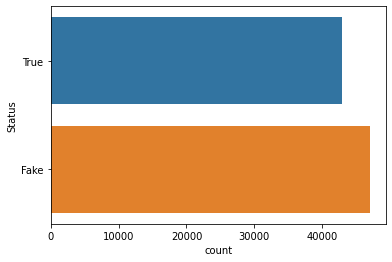

In [14]:
sns.countplot(data=df_final, y="Status")

In [15]:
df_final['Status'] = df_final['Status'].map({'True':1.0,'Fake':0.0})
df_final.head()

,Status,Content
0,1.0,ATLANTIC CITY (Reuters) - A New Jersey judge o...
1,0.0,BREAKING: ELECTRONICS BANNED on Some U.S. Flig...
2,0.0,SUNDAY SCREENING: National Security Alert: The...
3,0.0,PLEASE NOTE THE OVERWHELMING INFORMATION REGAR...
4,0.0,Luther Strange will likely be the first and la...


In [16]:
import nltk
nltk.download('omw-1.4')
import re 
import string
string.punctuation
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
def process(text):
    text = text.lower()
    text = "".join([i for i in text if i not in string.punctuation])
    text = re.split('W+',text)
    text = "".join([t for t in text if t not in stopwords.words('english')])
    text = [porter_stemmer.stem(word) for word in text]
    return text
    

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [17]:
print(df_final['Content'][0])
print(process(df_final['Content'][0]))

ATLANTIC CITY (Reuters) - A New Jersey judge on Friday rejected a bid by Governor Chris Christie’s administration to freeze spending by cash-strapped Atlantic City, which the governor argued was needed to protect tax revenues for city schools. Superior Court Judge Julio Mendez declined to order the city to stop all spending and divert what little remaining cash it has to the school district. But the nearly insolvent seaside gambling hub could find itself back in court with the state, which sued on Monday. Both sides are due back April 19, unless the city makes its April 15 payment to the district or can reach a deal on payments. Christie’s move was one of several on Monday that added to Atlantic City’s woes and kicked off a week of escalating mudslinging, perhaps the worst so far during the city’s recent financial crisis, in which Christie called Mayor Don Guardian a “liar.” That same day, Moody’s Investors Service downgraded Atlantic  City’s credit rating deeper into junk territory an

In [18]:
X = list(map(process, df_final['Content']))

In [19]:
print(X[0])

['a', 't', 'l', 'a', 'n', 't', 'i', 'c', ' ', 'c', 'i', 't', 'y', ' ', 'r', 'e', 'u', 't', 'e', 'r', 's', ' ', ' ', 'a', ' ', 'n', 'e', 'w', ' ', 'j', 'e', 'r', 's', 'e', 'y', ' ', 'j', 'u', 'd', 'g', 'e', ' ', 'o', 'n', ' ', 'f', 'r', 'i', 'd', 'a', 'y', ' ', 'r', 'e', 'j', 'e', 'c', 't', 'e', 'd', ' ', 'a', ' ', 'b', 'i', 'd', ' ', 'b', 'y', ' ', 'g', 'o', 'v', 'e', 'r', 'n', 'o', 'r', ' ', 'c', 'h', 'r', 'i', 's', ' ', 'c', 'h', 'r', 'i', 's', 't', 'i', 'e', '’', 's', ' ', 'a', 'd', 'm', 'i', 'n', 'i', 's', 't', 'r', 'a', 't', 'i', 'o', 'n', ' ', 't', 'o', ' ', 'f', 'r', 'e', 'e', 'z', 'e', ' ', 's', 'p', 'e', 'n', 'd', 'i', 'n', 'g', ' ', 'b', 'y', ' ', 'c', 'a', 's', 'h', 's', 't', 'r', 'a', 'p', 'p', 'e', 'd', ' ', 'a', 't', 'l', 'a', 'n', 't', 'i', 'c', ' ', 'c', 'i', 't', 'y', ' ', 'w', 'h', 'i', 'c', 'h', ' ', 't', 'h', 'e', ' ', 'g', 'o', 'v', 'e', 'r', 'n', 'o', 'r', ' ', 'a', 'r', 'g', 'u', 'e', 'd', ' ', 'w', 'a', 's', ' ', 'n', 'e', 'e', 'd', 'e', 'd', ' ', 't', 'o', ' ',

In [20]:
y = df_final['Status']

In [21]:
vocab_size = 5000
max_len = 30

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
token = Tokenizer(num_words=vocab_size)
token.fit_on_texts(X)

X = token.texts_to_sequences(X)

In [23]:
X =  pad_sequences(X,padding='pre',truncating='pre',maxlen=max_len)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True)

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dropout,Dense
model = Sequential([
    Embedding(vocab_size,100,input_length=max_len),
    Dropout(0.2),
    LSTM(200),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

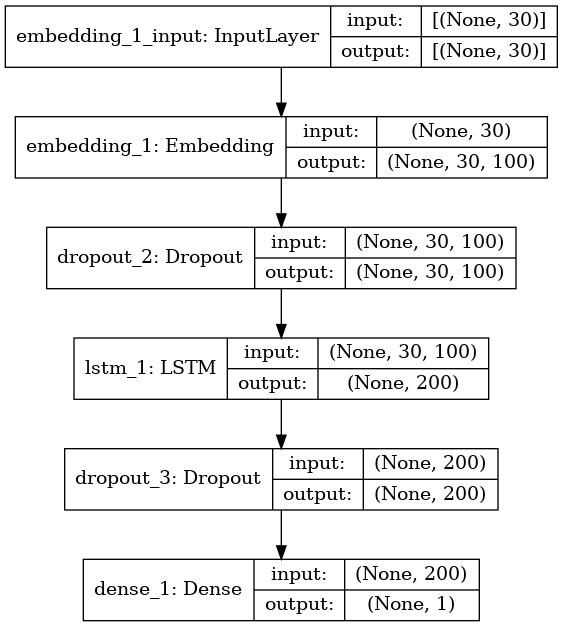

In [32]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 100)           500000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               240800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 741,001
Trainable params: 741,001
Non-trainable params: 0
_________________________________________________________________


In [34]:
results =  model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/20
1965/1965 [==============================] - 127s 63ms/step - loss: 0.4137 - acc: 0.7978 - val_loss: 0.3630 - val_acc: 0.8288
Epoch 2/20
1965/1965 [==============================] - 123s 62ms/step - loss: 0.3251 - acc: 0.8502 - val_loss: 0.2937 - val_acc: 0.8715
Epoch 3/20
1965/1965 [==============================] - 124s 63ms/step - loss: 0.2831 - acc: 0.8752 - val_loss: 0.2660 - val_acc: 0.8845
Epoch 4/20
1965/1965 [==============================] - 124s 63ms/step - loss: 0.2524 - acc: 0.8936 - val_loss: 0.2457 - val_acc: 0.8966
Epoch 5/20
1965/1965 [==============================] - 123s 63ms/step - loss: 0.2251 - acc: 0.9062 - val_loss: 0.2381 - val_acc: 0.9014
Epoch 6/20
1965/1965 [==============================] - 124s 63ms/step - loss: 0.2003 - acc: 0.9168 - val_loss: 0.2257 - val_acc: 0.9071
Epoch 7/20
1965/1965 [==============================] - 124s 63ms/step - loss: 0.1751 - acc: 0.9284 - val_loss: 0.2193 - val_acc: 0.9102
Epoch 8/20
1965/1965 [===================

<AxesSubplot:title={'center':'Loss'}>

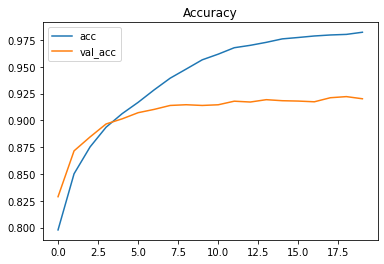

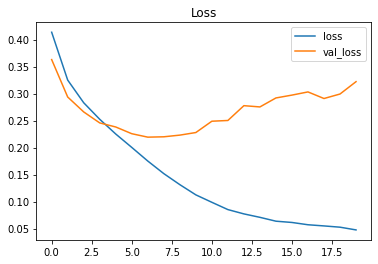

In [35]:
results_df = pd.DataFrame(results.history)
results_df[['acc','val_acc']].plot(title='Accuracy')
results_df[['loss','val_loss']].plot(title='Loss')

In [36]:
loss,acc = model.evaluate(X_test,y_test)
acc

842/842 [==============================] - 14s 16ms/step - loss: 0.3221 - acc: 0.9201


0.9201158285140991

In [62]:
def predict(text):
    text = process(text)
    text = token.texts_to_sequences(text)
    text = pad_sequences(text,padding='pre',truncating='pre',maxlen=max_len)
    result = model.predict(text)
    result = tf.squeeze(tf.round(result))
    return result

In [72]:
text = ["U.S. military to accept transgender recruits on Monday: Pentagon"]
print(predict(text[0]))

tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(61,), dtype=float32)
